In [ ]:
%matplotlib widget

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

In [12]:
# Study data files
social_media_path = ("cleaned_smmh.csv")

In [13]:
# Read the data
social_media_data = pd.read_csv(social_media_path)

In [14]:
social_media_data.head()

,Age,Gender,Relationship status,Occupation,Affiliated organizations,Social media use,Platforms,Hours per day,Frequency social media use w/o purpose,Frequency distracted by social media,...,Distracted easily,Level worriedness,Difficulty Concentrating,Frequency comparisons to others social media,Feelings about comparisons,Frequency seeking validation from social media,Frequency of depressed feelings,Fluctuation of interest daily activities,Issues sleeping,Total score
0,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,...,5,2,5,2,3,2,5,4,5,43
1,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,...,4,5,4,5,1,1,5,4,5,43
2,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,...,2,5,4,3,3,1,4,2,5,35
3,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,2,...,3,5,3,5,1,2,4,3,2,35
4,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,...,4,5,5,3,3,3,4,4,1,44


In [15]:
len(social_media_data["Age"].unique())

46

In [16]:
# Define age groups
bins = [0, 18, 25, 35, 45, 55, 65, 75]

labels = '0-18', '19-25', '26-35', '36-45', '46-55', '55-65', '66+'

In [17]:
social_media_data['Age Group'] = pd.cut(social_media_data['Age'], bins=bins, labels=labels, right=False)
                                    
count_per_group = social_media_data['Age Group'].value_counts().sort_index()

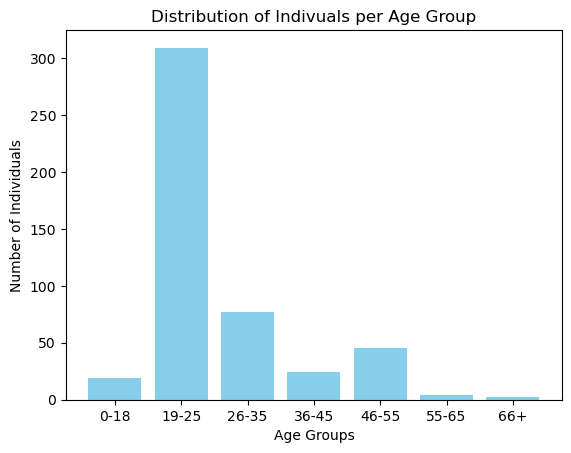

In [18]:
# Create a bar chart
plt.bar(count_per_group.index, count_per_group, color='skyblue')
plt.xlabel('Age Groups')
plt.ylabel('Number of Individuals')
plt.title('Distribution of Indivuals per Age Group')
plt.show()
        

In [19]:
# Find the different occupations
unique_occupations = social_media_data['Occupation'].unique()
print(unique_occupations)

['University Student' 'School Student' 'Salaried Worker' 'Retired']


In [20]:
hours_per_day = social_media_data['Hours per day'].unique()
print(hours_per_day)

['Between 2 and 3 hours' 'More than 5 hours' 'Between 3 and 4 hours'
 'Less than an Hour' 'Between 1 and 2 hours' 'Between 4 and 5 hours']


In [21]:
#counting individuals for each combination
counts = social_media_data.groupby(['Occupation', 'Hours per day']).size().reset_index(name='Count')


print(counts)

            Occupation          Hours per day  Count
0              Retired  Between 1 and 2 hours      2
1              Retired  Between 2 and 3 hours      1
2              Retired  Between 3 and 4 hours      2
3              Retired  Between 4 and 5 hours      2
4              Retired      More than 5 hours      1
5      Salaried Worker  Between 1 and 2 hours     36
6      Salaried Worker  Between 2 and 3 hours     33
7      Salaried Worker  Between 3 and 4 hours     14
8      Salaried Worker  Between 4 and 5 hours     13
9      Salaried Worker      Less than an Hour     21
10     Salaried Worker      More than 5 hours     15
11      School Student  Between 1 and 2 hours      3
12      School Student  Between 2 and 3 hours     13
13      School Student  Between 3 and 4 hours      8
14      School Student  Between 4 and 5 hours     12
15      School Student      Less than an Hour      1
16      School Student      More than 5 hours     12
17  University Student  Between 1 and 2 hours 

In [22]:
# group data by 'Occupation' and 'Hours per day'
grouped_data = social_media_data.groupby(['Occupation', 'Hours per day']).size().unstack()

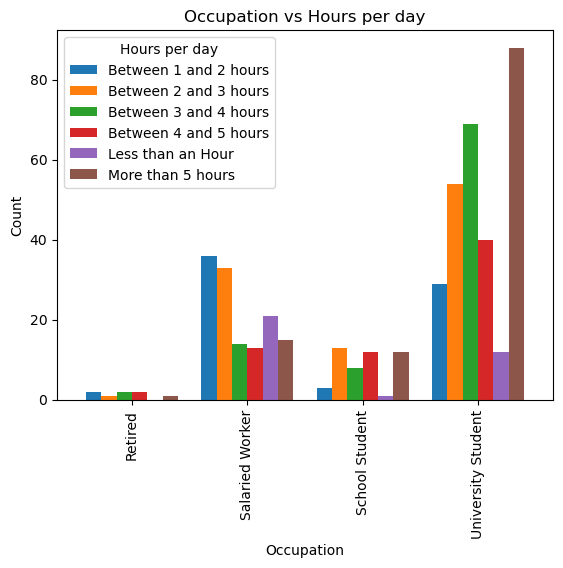

In [23]:
#plot the bar chart
grouped_data.plot(kind='bar', width=0.8)

plt.title('Occupation vs Hours per day')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.legend(title='Hours per day')
plt.show()

In [29]:
#Find the different social media platforms
unique_platforms = pd.DataFrame({"Facebook",
                                 "Twitter",
                                 "Instagram",
                                 "YouTube",
                                 "Discord",
                                 "Reddit",
                                 "interest",
                                 "TikTok",
                                 "Snapchat"



})
unique_platforms

,0
0,Twitter
1,Facebook
2,interest
3,Snapchat
4,Instagram
5,Reddit
6,YouTube
7,Discord
8,TikTok


In [31]:
plat = social_media_data["Platforms"]

plat

0      Facebook, Twitter, Instagram, YouTube, Discord...
1      Facebook, Twitter, Instagram, YouTube, Discord...
2                Facebook, Instagram, YouTube, Pinterest
3                                    Facebook, Instagram
4                           Facebook, Instagram, YouTube
                             ...                        
476                         Facebook, Instagram, YouTube
477                                    Facebook, YouTube
478                                    Facebook, YouTube
479    Facebook, Twitter, Instagram, YouTube, Discord...
480                                    Facebook, YouTube
Name: Platforms, Length: 481, dtype: object

In [35]:
#Get the total number of users per platform
fb_count = 0
twt_count = 0
pint_count = 0
snap_count = 0 
insta_count = 0
red_count = 0
yt_count = 0
dis_count = 0
tt_count = 0

for item in plat:
    if "Facebook" in item:
        fb_count += 1
for item in plat:
    if "Twitter" in item:
        twt_count += 1
for item in plat:
    if "Pinterest" in item:
        pint_count += 1
for item in plat:
    if "Snapchat" in item:
        snap_count += 1
for item in plat:
    if "Instagram" in item:
        insta_count += 1
for item in plat:
    if "Reddit" in item:
        red_count += 1
for item in plat:
    if "YouTube" in item:
        yt_count += 1
for item in plat:
    if "Discord" in item:
        dis_count += 1
for item in plat:
    if "TikTok" in item:
        tt_count += 1

print(fb_count)
print(twt_count)
print(pint_count)
print(snap_count)
print(insta_count)
print(red_count)
print(yt_count)
print(dis_count)
print(tt_count)

407
131
145
181
359
126
412
198
94


In [48]:
#Find the different social media platform counts
unique_platforms = pd.DataFrame({"Facebook": [fb_count],
                                 "Twitter": [twt_count],
                                 "Instagram": [insta_count],
                                 "YouTube": [yt_count],
                                 "Discord": [dis_count],
                                 "Reddit": [red_count],
                                 "Pinterest": [pint_count],
                                 "TikTok": [tt_count],
                                 "Snapchat": [snap_count]



})
unique_platforms


,Facebook,Twitter,Instagram,YouTube,Discord,Reddit,Pinterest,TikTok,Snapchat
0,407,131,359,412,198,126,145,94,181


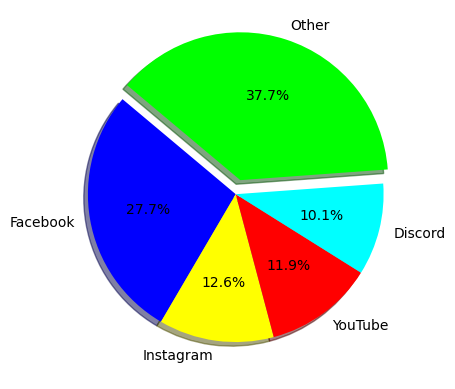

In [49]:
#Create pie chart for which social media platforms are used
labels = ["Facebook", "Instagram", "YouTube", "Discord", "Other"]
sizes = [220,100, 95, 80, 300]
colors = ["blue", "yellow", "red", "cyan", "lime"]
explode = (0, 0, 0, 0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.show()

TypeError: only size-1 arrays can be converted to Python scalars

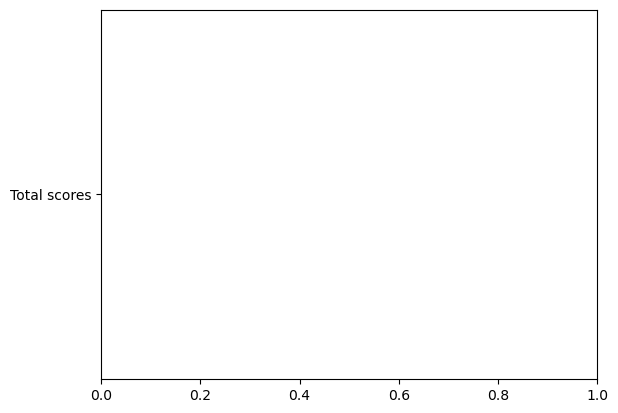

In [54]:
users = ["Total scores"]
x_axis = unique_platforms
plt.bar(x_axis, users, color='r', alpha= 0.5, align='center')